In [1]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import random
import matplotlib
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 导入之前的实验数据
xls_path = 'E:\\Phd\\Research\\Experiments\\0416\\data.xlsx'
x1 = pd.read_excel(xls_path, sheet_name='x1', header=None).to_numpy()

df_res = pd.read_excel(xls_path, sheet_name='res')
res_0 = df_res['res_0'].to_numpy().reshape(-1, 1)

df_label = pd.read_excel(xls_path, sheet_name='label')
label_x1 = df_label['label_x1'].to_numpy()

In [5]:
ind_x1_0 = np.argwhere(label_x1 == 0).flatten().tolist()
ind_x1_1 = np.argwhere(label_x1 == 1).flatten().tolist()
ind_x1_2 = np.argwhere(label_x1 == 2).flatten().tolist()
ind_x1_3 = np.argwhere(label_x1 == 3).flatten().tolist()
ind_x1_4 = np.argwhere(label_x1 == 4).flatten().tolist()
ind_x1_5 = np.argwhere(label_x1 == 5).flatten().tolist()
ind_x1_6 = np.argwhere(label_x1 == 6).flatten().tolist()
ind_x1_7 = np.argwhere(label_x1 == 7).flatten().tolist()
ind_x1_8 = np.argwhere(label_x1 == 8).flatten().tolist()
ind_x1_9 = np.argwhere(label_x1 == 9).flatten().tolist()

In [6]:
# 加载Fashion-MNIST数据集
(x2_train, y2_train), (x2_test, y2_test) = fashion_mnist.load_data()
x2_all = x2_train.reshape(60000, 784)

In [8]:
ind_x2_0 = np.argwhere(y2_train == 0).flatten().tolist()
ind_x2_1 = np.argwhere(y2_train == 1).flatten().tolist()
ind_x2_2 = np.argwhere(y2_train == 2).flatten().tolist()
ind_x2_3 = np.argwhere(y2_train == 3).flatten().tolist()
ind_x2_4 = np.argwhere(y2_train == 4).flatten().tolist()
ind_x2_5 = np.argwhere(y2_train == 5).flatten().tolist()
ind_x2_6 = np.argwhere(y2_train == 6).flatten().tolist()
ind_x2_7 = np.argwhere(y2_train == 7).flatten().tolist()
ind_x2_8 = np.argwhere(y2_train == 8).flatten().tolist()
ind_x2_9 = np.argwhere(y2_train == 9).flatten().tolist()

### 实验1-3：MNIST->Fashion-MNIST N=5000 整类替换
### 实验1-3-1：Fashion Class 3 (连衣裙) -> MNIST Class 1

In [9]:
"""获得x1降维后的一维分布"""
# 使用网格搜索交叉验证来优化带宽
params_0 = {'bandwidth': np.logspace(-1, 3, 40)}
grid_0 = GridSearchCV(KernelDensity(), params_0)
grid_0.fit(res_0)
print("best bandwidth 1d: {0}".format(grid_0.best_estimator_.bandwidth))

# 使用最佳估计器来计算核密度估计
kde_0 = grid_0.best_estimator_

best bandwidth 1d: 46.41588833612777


In [11]:
# Fashion Class 3 (连衣裙) -> MNIST Class 1
x1_m1_f3 = x1
x1_m1_f3[ind_x1_1] = x2_all[ind_x2_3[:len(ind_x1_1)]]

In [12]:
"""Fashion Class 3 (连衣裙) -> MNIST Class 1降维后的一维分布"""
pca_m1_f3 = PCA(n_components=1, whiten=False)
res_m1_f3 = pca_m1_f3.fit_transform(x1_m1_f3)

# 使用网格搜索交叉验证来优化带宽
params_m1_f3 = {'bandwidth': np.logspace(-1, 3, 40)}
grid_m1_f3 = GridSearchCV(KernelDensity(), params_m1_f3)
grid_m1_f3.fit(res_m1_f3)
print("best bandwidth 1d: {0}".format(grid_m1_f3.best_estimator_.bandwidth))

# 使用最佳估计器来计算核密度估计
kde_m1_f3 = grid_m1_f3.best_estimator_

best bandwidth 1d: 74.43803013251689


#### a) 不同一维分布的可视化对比

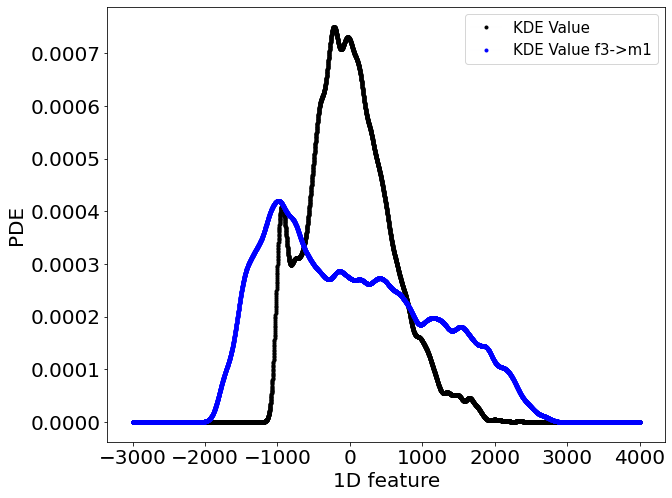

In [13]:
xplot = np.linspace(-3000, 4000, 7000).reshape(-1,1)
dens_0 = kde_0.score_samples(xplot)  # 返回的是点对应概率密度的log值，需要使用exp求指数还原
dens_m1_f3 = kde_m1_f3.score_samples(xplot)

plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(xplot, np.exp(dens_0), marker='.', linewidth=0.01, c="k", label='KDE Value')
plt.plot(xplot, np.exp(dens_m1_f3), marker='.', linewidth=0.01, c="b", label='KDE Value f3->m1')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('1D feature', font)
plt.ylabel('PDE', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

#### b) 1D特征区间KL散度值变化

In [24]:
# [-2000, -1500)区间
xplot_int9 = np.linspace(-2000, -1500, 500).reshape(-1,1)
dens_0_int9 = kde_0.score_samples(xplot_int9)
dens_m1_f3_int9 = kde_m1_f3.score_samples(xplot_int9)

# [-1500, -1000)区间
xplot_int2 = np.linspace(-1500, -1000, 500).reshape(-1,1)
dens_0_int2 = kde_0.score_samples(xplot_int2)
dens_m1_f3_int2 = kde_m1_f3.score_samples(xplot_int2)

# [-1000, -500)区间
xplot_int = np.linspace(-1000, -500, 500).reshape(-1,1)
dens_0_int = kde_0.score_samples(xplot_int)
dens_m1_f3_int = kde_m1_f3.score_samples(xplot_int)

# [-500, 0)区间
xplot_int3 = np.linspace(-500, 0, 500).reshape(-1,1)
dens_0_int3 = kde_0.score_samples(xplot_int3)
dens_m1_f3_int3 = kde_m1_f3.score_samples(xplot_int3)

# [0, 500)区间
xplot_int1 = np.linspace(0, 500, 500).reshape(-1,1)
dens_0_int1 = kde_0.score_samples(xplot_int1)
dens_m1_f3_int1 = kde_m1_f3.score_samples(xplot_int1)

# [500, 1000)区间
xplot_int4 = np.linspace(500, 1000, 500).reshape(-1,1)
dens_0_int4 = kde_0.score_samples(xplot_int4)
dens_m1_f3_int4 = kde_m1_f3.score_samples(xplot_int4)

# [1000, 1500)区间
xplot_int5 = np.linspace(1000, 1500, 500).reshape(-1,1)
dens_0_int5 = kde_0.score_samples(xplot_int5)
dens_m1_f3_int5 = kde_m1_f3.score_samples(xplot_int5)

# [1500, 2000)区间
xplot_int6 = np.linspace(1500, 2000, 500).reshape(-1,1)
dens_0_int6 = kde_0.score_samples(xplot_int6)
dens_m1_f3_int6 = kde_m1_f3.score_samples(xplot_int6)

# [2000, 2500)区间
xplot_int7 = np.linspace(2000, 2500, 500).reshape(-1,1)
dens_0_int7 = kde_0.score_samples(xplot_int7)
dens_m1_f3_int7 = kde_m1_f3.score_samples(xplot_int7)

# [2500, 3000)区间
xplot_int8 = np.linspace(2500, 3000, 500).reshape(-1,1)
dens_0_int8 = kde_0.score_samples(xplot_int8)
dens_m1_f3_int8 = kde_m1_f3.score_samples(xplot_int8)

In [25]:
KL_int  = scipy.stats.entropy(np.exp(dens_0_int), np.exp(dens_m1_f3_int))
KL_int1 = scipy.stats.entropy(np.exp(dens_0_int1), np.exp(dens_m1_f3_int1))
KL_int2 = scipy.stats.entropy(np.exp(dens_0_int2), np.exp(dens_m1_f3_int2))
KL_int3 = scipy.stats.entropy(np.exp(dens_0_int3), np.exp(dens_m1_f3_int3))
KL_int4 = scipy.stats.entropy(np.exp(dens_0_int4), np.exp(dens_m1_f3_int4))
KL_int5 = scipy.stats.entropy(np.exp(dens_0_int5), np.exp(dens_m1_f3_int5))
KL_int6 = scipy.stats.entropy(np.exp(dens_0_int6), np.exp(dens_m1_f3_int6))
KL_int7 = scipy.stats.entropy(np.exp(dens_0_int7), np.exp(dens_m1_f3_int7))
KL_int8 = scipy.stats.entropy(np.exp(dens_0_int8), np.exp(dens_m1_f3_int8))
KL_int9 = scipy.stats.entropy(np.exp(dens_0_int9), np.exp(dens_m1_f3_int9))

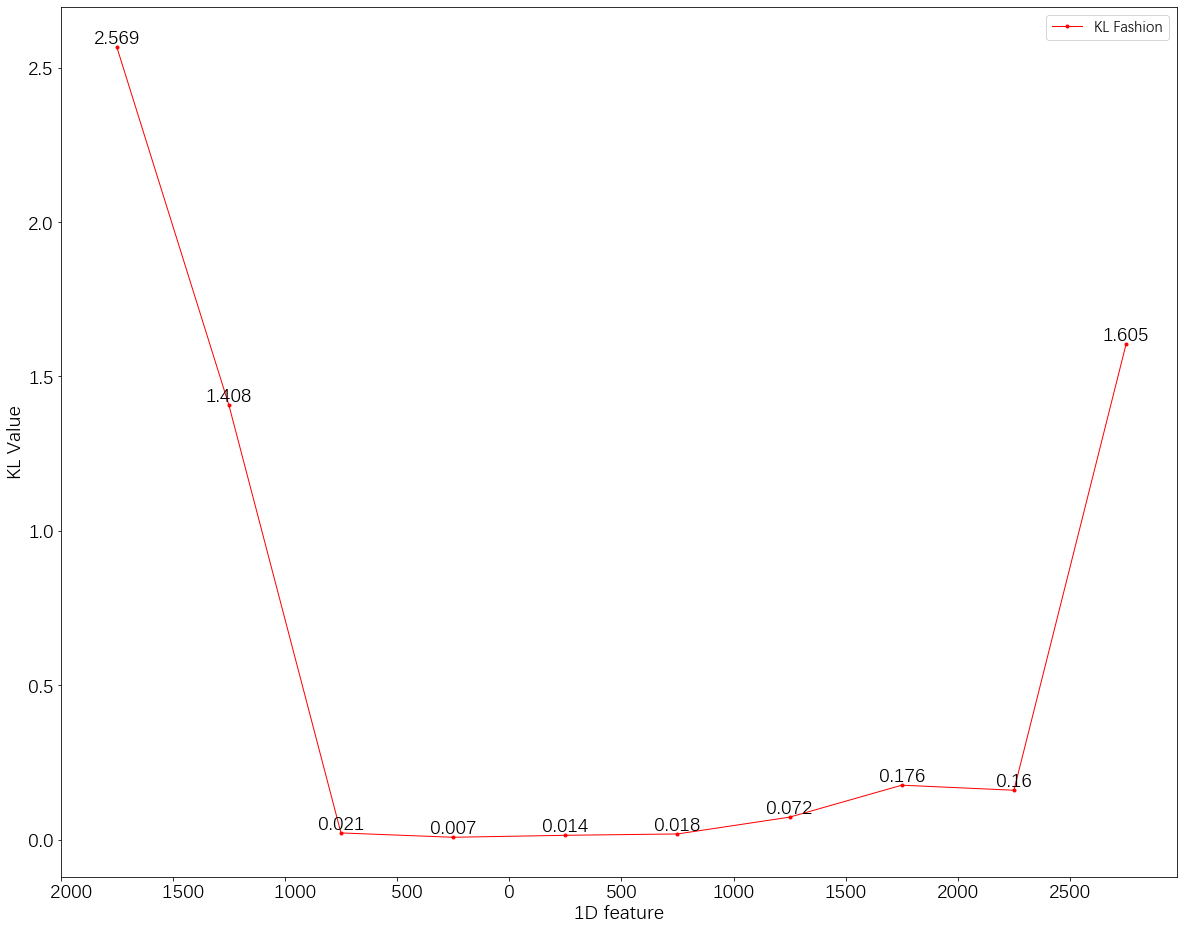

In [43]:
"""可视化KL散度折线图"""
xplot_KL = [-1750, -1250, -750, -250, 250, 750, 1250, 1750, 2250, 2750]
KL_f = [KL_int9, KL_int2, KL_int, KL_int3, KL_int1, KL_int4, KL_int5, KL_int6, KL_int7, KL_int8]

plt.figure(figsize = (20, 16))  # 设置画布大小
plt.plot(xplot_KL, KL_f, marker='.', linewidth=1, c="r", label='KL Fashion')

for c, d in zip(xplot_KL, KL_f):
    plt.text(c, d, (float('%.3f'%d)), ha='center', va='bottom', fontsize=20)

plt.xticks(np.arange(-2000, 3000, step=500))
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('1D feature', font)
plt.ylabel('KL Value', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

#### c) 被替换样本与替换样本的特征值分布

In [29]:
ind_m1_int9 = [i for i,x in enumerate(res_0[ind_x1_1]) if (-2000 <= x < -1500)]
ind_m1_int2 = [i for i,x in enumerate(res_0[ind_x1_1]) if (-1500 <= x < -1000)]
ind_m1_int = [i for i,x in enumerate(res_0[ind_x1_1]) if (-1000 <= x < -500)]
ind_m1_int3 = [i for i,x in enumerate(res_0[ind_x1_1]) if (-500 <= x < 0)]
ind_m1_int1 = [i for i,x in enumerate(res_0[ind_x1_1]) if (0 <= x < 500)]
ind_m1_int4 = [i for i,x in enumerate(res_0[ind_x1_1]) if (500 <= x < 1000)]
ind_m1_int5 = [i for i,x in enumerate(res_0[ind_x1_1]) if (1000 <= x < 1500)]
ind_m1_int6 = [i for i,x in enumerate(res_0[ind_x1_1]) if (1500 <= x < 2000)]
ind_m1_int7 = [i for i,x in enumerate(res_0[ind_x1_1]) if (2000 <= x < 2500)]
ind_m1_int8 = [i for i,x in enumerate(res_0[ind_x1_1]) if (2500 <= x < 3000)]

In [30]:
ind_f3_int9 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-2000 <= x < -1500)]
ind_f3_int2 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-1500 <= x < -1000)]
ind_f3_int = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-1000 <= x < -500)]
ind_f3_int3 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (-500 <= x < 0)]
ind_f3_int1 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (0 <= x < 500)]
ind_f3_int4 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (500 <= x < 1000)]
ind_f3_int5 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (1000 <= x < 1500)]
ind_f3_int6 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (1500 <= x < 2000)]
ind_f3_int7 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (2000 <= x < 2500)]
ind_f3_int8 = [i for i,x in enumerate(res_m1_f3[ind_x1_1]) if (2500 <= x < 3000)]

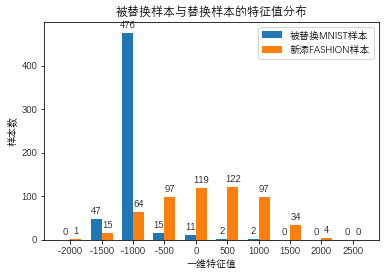

In [41]:
matplotlib.rcParams['font.family']=["DengXian", "sans-serif"]

labels = ['-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000', '2500']
mnist_means = [len(ind_m1_int9), len(ind_m1_int2), len(ind_m1_int), len(ind_m1_int3), len(ind_m1_int1), len(ind_m1_int4), len(ind_m1_int5), len(ind_m1_int6), len(ind_m1_int7), len(ind_m1_int8)]
fashion_means = [len(ind_f3_int9), len(ind_f3_int2), len(ind_f3_int), len(ind_f3_int3), len(ind_f3_int1), len(ind_f3_int4), len(ind_f3_int5), len(ind_f3_int6), len(ind_f3_int7), len(ind_f3_int8)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects2 = ax.bar(x - width/2, mnist_means, width, label='被替换MNIST样本')
rects3 = ax.bar(x + width/2, fashion_means, width, label='新添FASHION样本')

ax.set_ylabel('样本数')
ax.set_xlabel('一维特征值')
ax.set_title('被替换样本与替换样本的特征值分布')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2)
autolabel(rects3)

fig_int1.tight_layout()